# Case Study 1: From Exploration to Design

- Name: YELIA YE
- Student ID: 89657605
- Link to GitHub Repository: https://github.com/wsl0917/DSCI200_case_study_1 

This blank notebook is provided for you to use to answer questions from [Case Study 1](https://ubc-dsci.github.io/dsci-200/case-studies/case-study-1.html). 

In [43]:
install.packages('tidyverse')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [44]:
devtools::install_github("lbelzile/hecedsm")

Skipping install of 'hecedsm' from a github remote, the SHA1 (df0a5444) has not changed since last install.
  Use `force = TRUE` to force installation



In [45]:
library(tidyverse)
library(hecedsm)
library(naniar)

## 🏁 Milestone 1: Exploratory Data Analysis (EDA) (60 points)

### Task 1: Choose your favourite dataset (15 points)

#### 1. Choose one of the studies of your choice from the options above. Download the paper from the provided link and load data in R. (Mechanics: 5 points)

For this case study, I selected the dataset BRLS21_EDA, which corresponds to the study “Smartwatches are more distracting than mobile phones while driving: Results from an experimental study”.

In [46]:
df <- BRLS21_EDA

head(df)
tail(df)

id reltime task     occurence eda      hr      
1 1  0       baseline 1         20.60959 88.49560
2 1  1       baseline 1         21.41062 88.31564
3 1  2       baseline 1         22.26244 78.13892
4 1  3       baseline 1         24.22100 65.82009
5 1  4       baseline 1         24.23851 65.13290
6 1  5       baseline 1         23.63703 66.83456

id reltime task     occurence eda     hr      
1 31 84      baseline 1         9.30636 70.40646
2 31 85      baseline 1         9.19470 68.57015
3 31 86      baseline 1         9.12748 68.81737
4 31 87      baseline 1         9.06074 69.99720
5 31 88      baseline 1         8.99553 67.97647
6 31 89      baseline 1         8.95182 67.06497

The primary goal of this study is to investigate how different communication devices affect driver distraction during a driving task. Specifically, this research compared the impact of different types of notifications on drivers when received via smartwatches, smartphones, and voice assistants in a driving scenario. The results indicate that smartwatches are more distracting than smartphones while driving. These findings are important for road safety research and can help inform guidelines about the use of devices while driving.

### Task 2: Explore data (8 points)

#### 3. Use the glimpse() or head() function to examine your dataset. How many observations and variables are there in the dataset? (Writing: 1 point)

In [47]:
glimpse(df)

Rows: 10,942
Columns: 6
$ id        <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ reltime   <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ task      <fct> baseline, baseline, baseline, baseline, baseline, baseline, …
$ occurence <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ eda       <dbl> 20.60959, 21.41062, 22.26244, 24.22100, 24.23851, 23.63703, …
$ hr        <dbl> 88.49560, 88.31564, 78.13892, 65.82009, 65.13290, 66.83456, …


The dataset contains 10942 observations and 6 variables.

#### 4. What type of variables are in the dataset? (i.e numerical vs. categorical). Explain briefly. (Writing: 1 point)

The variables in the dataset include both numerical variables and categorical variables. Numerical variables include reltime, occurence, eda, and hr, as they represent measured values or counts. Categorical variables include id and task, which are stored as factors and are used to identify participants and experimental conditions.

#### 5. Would you need to convert any variable in the dataset before starting your analysis? Explain briefly why or why not. (Reasoning: 2 points)

No variable conversion is necessary because the variables are already stored in appropriate formats for analysis. Categorical variables are coded as factors, and numerical variables are stored as numeric values, so the dataset can be used directly.

#### 6. How many missing values are there for each variable in the dataset? Are there any variables with a large proportion of missing data (e.g., more than 20%)? (Writing: 2 points)

In [48]:
df %>%
  miss_var_summary()

variable  n_miss pct_miss
1 hr        538    4.92    
2 eda       214    1.96    
3 id          0    0       
4 reltime     0    0       
5 task        0    0       
6 occurence   0    0

There are missing values in two variables in the dataset. The variable hr has 538 missing values (4.92%), and eda has 214 missing values (1.96%). The remaining variables have no missing values. None of the variables have a large proportion of missing data.

#### 7. Is there evidence of class imbalance in any categorical variable in the dataset (e.g., one category makes up a large majority of the observations)? (Reasoning: 2 points)

In [49]:
df %>%
  count(task)

task      n   
1 baseline  2736
2 cell      3028
3 voicecall 1392
4 watch     3786

There is evidence of class imbalance in categorical variable task. Watch having the largest number of observations (3,786) and voicecall having the smallest (1,392).

### Task 3: Data visualization (15 points)

#### 8. Select two numerical variables from the dataset and name them here. What type of plot would be appropriate to explore the relationship between these two variables? Write the R code to produce this plot. Describe any pattern you observe. (Reasoning: 2.5 points + Coding: 2.5 points)

Warning message:
“Removed 739 rows containing missing values or values outside the scale range
(`geom_point()`).”


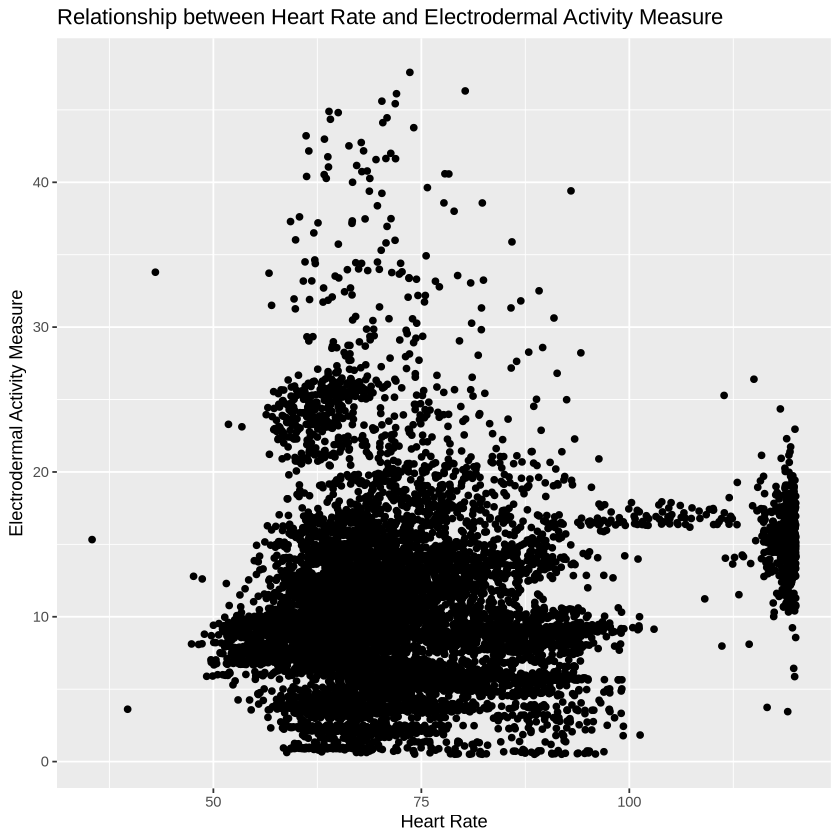

In [50]:
df %>%
  ggplot(aes(x = hr, y = eda)) +
  geom_point() +
  labs(title = "Relationship between Heart Rate and Electrodermal Activity Measure",
       x = "Heart Rate",
       y = "Electrodermal Activity Measure")

A scatter plot would be appropriate to explore the relationship between two numerical variables. Scatter plots show the relationship between two continuous variables and allow us to observe potential correlations. The scatter plot above shows a weak positive relationship between heart rate and electrodermal activity measure. As heart rate increases, EDA tends to increase slightly.

#### 9. Create an appropriate plot to show the distribution of one numerical variable in the dataset. What does the distribution tell you about the variable? What is a typical observation from this distribution? (Reasoning: 2.5 points + Coding: 2.5 points)

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
Warning message:
“Removed 538 rows containing non-finite outside the scale range (`stat_bin()`).”


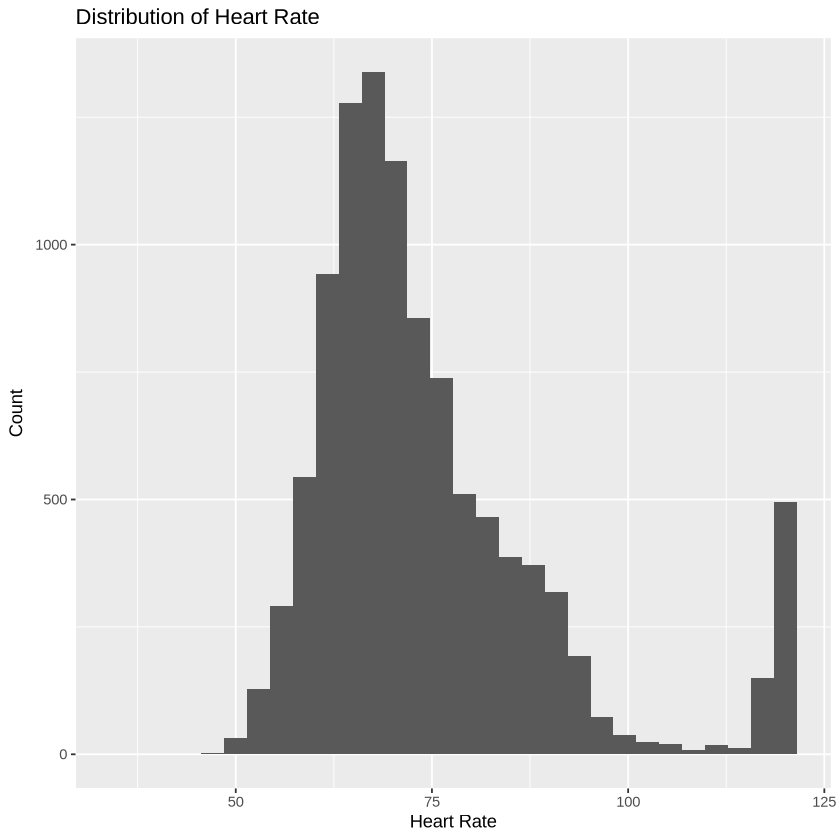

In [58]:
df %>%
  ggplot(aes(x = hr)) +
  geom_histogram() +
  labs(title = "Distribution of Heart Rate",
       x = "Heart Rate",
       y = "Count")

The histogram above shows that most heart rate observations are between roughly 65 and 80, with a peak around 70. The distribution is slightly right-skewed, and there are some higher heart rates above 100. A typical heart rate in this dataset is around 70–75.

#### 10. Pick one numerical and one categorical variable from your dataset. Using an appropriate plot, what insights can you draw about the relationship between these two variables? (Reasoning: 2.5 points + Coding: 2.5 points)

Warning message:
“Removed 538 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


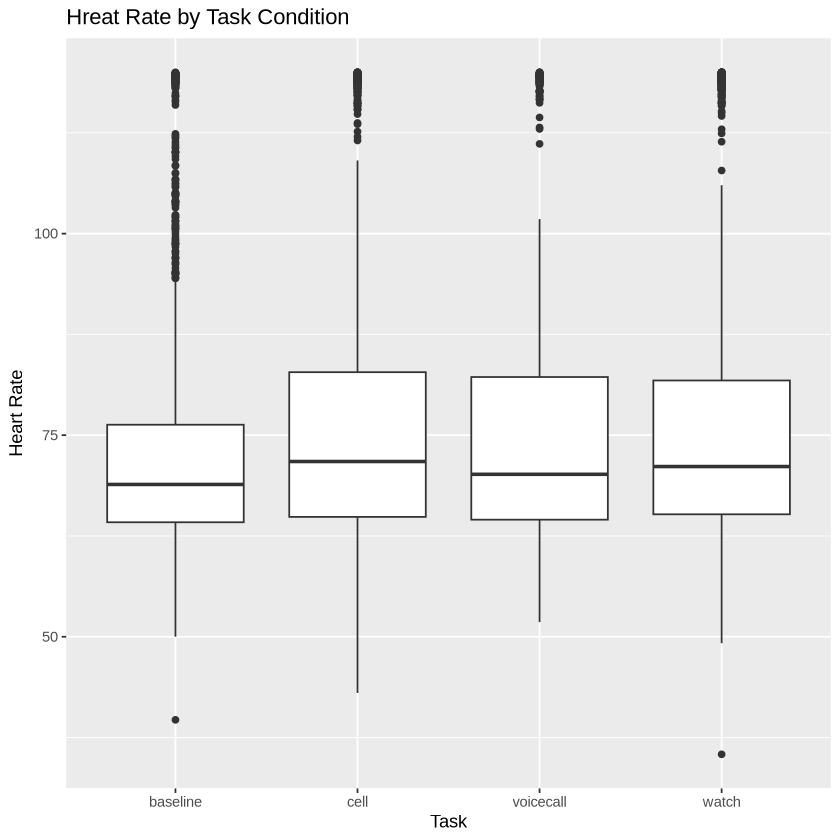

In [52]:
df %>%
  ggplot(aes(x = task, y = hr)) +
  geom_boxplot() +
  labs(title = "Hreat Rate by Task Condition", 
       x = "Task",
       y = "Heart Rate")

The above plot shows that how heart rate varies across different task conditions. The medians of the heart rates are similar in all task conditions.

#### 11. Create an appropriate plot to show the distribution of one categorical variable in the dataset. What does the distribution tell you about the variable? Is there a “typical” value? (Reasoning: 2.5 points + Coding: 2.5 points)

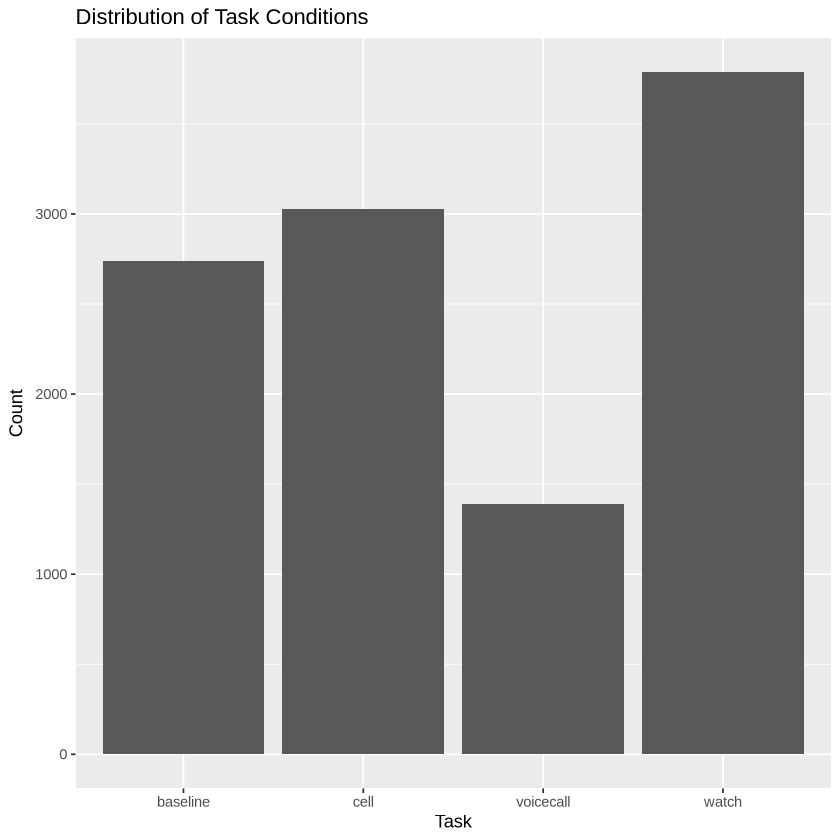

In [53]:
df %>%
  ggplot(aes(x = task)) +
  geom_bar() +
  labs(title = "Distribution of Task Conditions",
       x = "Task",
       y = "Count")

The distribution above shows that some task categories have more observations than others. There is no “typical” value.

### Task 4: Find summary statistics (10 points)

#### 12. Choose one numerical variable from your dataset. Report an appropriate measure of central tendency and explain why this measure is appropriate for the variable you selected. (Reasoning: 3 points + Coding: 2 points)

In [54]:
df %>%
  summarize(median_hr = median(hr, na.rm = TRUE))

median_hr
1 70.47726

I choose numerical variable  hr for this question. I would report the median to be the central tendency for the hreat rate. From the previous question, we see that the distribution of the heart reate is right-skewed, and median is robust to extreme values and skewness in the distribution.

#### 13. Choose one categorical variable from your dataset. Report a relevant summary statistic and explain why it is informative. (Reasoning: 3 points + Coding: 2 points)

In [55]:
df %>%
  count(task)

task      n   
1 baseline  2736
2 cell      3028
3 voicecall 1392
4 watch     3786

I choose the categorical varible task for this question. I would report the count for each task, since it shows the imbalance in this experimental.

#### 14. Choose two variables from your dataset and compute an appropriate measure of association to measure their relationship. Interpret the value in a simple language. (Reasoning: 3 points + Coding: 2 points)

In [56]:
df %>%
  summarize(correlation = cor(hr, eda, use = "complete.obs"))

correlation
1 0.1435454

I selected heart rate and electrodermal activity for this question . The linear relationship between them was measured by correlation coefficient. This indicates a weak positive correlation between the two variables.

### Task 5: Develop a question (12 points)

#### 15. Think of a research question you would like to explore using this dataset if you were the author of this paper. Write your question in one or two sentences in simple and plain language. (Reasoning: 4 points)

Are there significant differences in physiological responses under different task conditions while driving? Specifically, does receiving smartwatch notifications cause greater changes in heart rate and EDA compared to other types of notifications?

#### 16. Based on the question you wrote do you think you need to do the splitting of your data into train and test? Answer in two or three sentences. (Reasoning: 4 points)

Base on the above question, I don't need to do the splitting of the data into train and test. Since it is a inferential research question,  we don't need to construct a predictive model.

#### 17. Considering your dataset and research question, create a new feature derived from the existing variables in your dataset that could help you answer your question. Describe how you constructed this variable and explain why you think it will be useful. (Reasoning: 2 points + Coding: 2 points)

In [59]:
df <- df %>%
  mutate(score = case_when(
          hr < 70 & eda < 5 ~ 1,
          hr < 80 & eda < 10 ~ 2,
          hr < 90 & eda < 15 ~ 3,
          hr < 100 & eda < 20 ~ 4,
          TRUE ~ 5))

Actually, I want to create a new feature for physiological response indices. However, I'm not entirely sure how best to categorize heart rate and EDA. The basic idea is to establish simple rules based on these two measurements and assign them scores from 1 to 5. This way, we don't have to separately consider how each variable changes under different tasks. Instead, we can observe and analyze how this composite score of heart rate and EDA responds to different tasks.

## 🏁 Milestone 2: Sampling and Study Design (35 points)

### Task 6: Describe design (15 points)

#### 18. What type of data analysis questions are the authors of the paper hoping to answer? Recall the different types of data analysis questions you learned in DSCI 100 (e.g., descriptive, inferential, predictive, causal, exploratory). Which category or categories best describe the authors’ goals? (Reasoning: 5 points)

The authors want to answer causal questions. They sought to determine whether different types of communication devices exert varying causal effects on driving distraction levels. This was achieved by controlling experimental conditions to examine the causal relationship between device type and distraction levels.

#### 19. Describe the population and sample used in this study. Clearly define both the population of interest and the sample that was actually observed in the study. (Reasoning: 5 points)

The population is the drivers who may receive notifications while driving. The sample consists of 31 participants who took part in this research experiment.

#### 20. Was this an observational study or controlled experiment study? Explain your reasoning using relevant terminology. (Reasoning: 5 points)

This is a controlled experimental study, not an observational study. Because participants were randomly assigned to different experimental conditions, and the data included a baseline condition as a control group, allowing comparison with other task conditions.

### Task 7: Dive into the design! (10 points)

#### 21. Did researchers control for any confounding variable in this study? If yes explain how. If no, can you think of any potential confounding variable that you can adjust for? Explain your reasoning. (Reasoning: 5 points)

Yes, researchers controlled confounding variables in this study. According to the paper's methods section, all participants underwent health screening to minimize differences arising from physical health issues. Subsequently, all participants were required to wear appropriate driving shoes, possess a valid driver's license compliant with provincial regulations, and confirm they did not suffer from motion sickness.

#### 22. What type of sampling method did the authors use? Cite the section of the paper where the sampling method is described or being inferred. Why do you think the authors chose this method over others? (Reasoning: 5 points)

The author employed a convenience sampling method. In Section 3.2. Sample and Procedure, it is mentioned that participants were recruited through the university's research recruitment platform. This sampling method implies that the researcher selected individuals who were most readily accessible and willing to participate. The experimental process is relatively lengthy, it requires participants' cooperation.

#### 23. Were there any potential sources of sampling bias that may have affected the study’s conclusions? Explain your reasoning. (Reasoning: 5 points)

Participants recruited through research recruitment platforms may predominantly be younger and more highly educated, potentially resulting in a sample lacking older or less educated drivers.

### Task 8: Now it is your turn! (10 points)

#### 24. If you were to design this study yourself, would you use a different sampling and design method? Why or why not? Reflect on what you might do differently and how your choice of sampling method might affect the results. Additionally, consider why the authors might have chosen not to use alternative sampling or design methods. What are the potential limitations or challenges of your proposed approach? (Reasoning: 10 points)

If I were to redesign this study, I would use stratified sampling instead of convenience sampling to obtain a sample of drivers that better represents different age groups and levels of driving experience. This would ensure the findings apply to a broader population, not just young college students. Although this approach would be more expensive and time-consuming, it would make the results more reliable for practical applications such as road safety guidelines. The authors likely chose convenience sampling because it is simpler and cheaper, and their primary focus was on verifying whether a difference exists rather than precisely measuring its magnitude across all drivers.